<a href="https://colab.research.google.com/github/fzmoussaid/MLPlayground/blob/master/CNN/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar

# Download the class repository
! git clone https://github.com/aamini/introtodeeplearning_labs.git  > /dev/null 2>&1
% cd introtodeeplearning_labs 
! git pull
% cd .. 

# Import the necessary class-specific utility files for this lab
import introtodeeplearning_labs as util

/content/introtodeeplearning_labs
Already up to date.
/content


In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


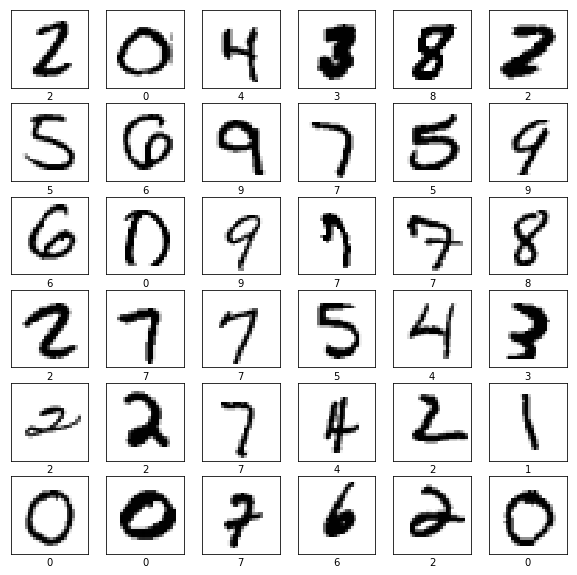

In [0]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation=tf.nn.relu), # TODO        


      tf.keras.layers.MaxPool2D(pool_size=(2,2)), 

        #'''TODO: Define the second convolutional layer'''
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), input_shape=(13, 13, 1), activation=tf.nn.relu), # TODO

        #'''TODO: Define the second max pooling layer'''
      tf.keras.layers.MaxPool2D(pool_size=(2,2)), # TODO

      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      # '''TODO: Define the activation function for the first fully connected layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
''''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 64
EPOCHS = 20

In [0]:
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.1869 - acc: 0.9441
Epoch 2/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0554 - acc: 0.9831
Epoch 3/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0395 - acc: 0.9877
Epoch 4/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0296 - acc: 0.9907
Epoch 5/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0229 - acc: 0.9930
Epoch 6/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0193 - acc: 0.9937
Epoch 7/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0147 - acc: 0.9952
Epoch 8/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0118 - acc: 0.9964
Epoch 9/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0113 - acc: 0.9960
Epoch 10/20
60000/60000 [==============================] - 7s 122us/samp

In [0]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 105us/sample - loss: 0.0466 - acc: 0.9906
('Test accuracy:', 0.9906)


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([2.9412144e-16, 8.4821693e-15, 7.3638619e-14, 1.7543426e-14,
       4.6424593e-22, 6.9542993e-18, 2.8482870e-24, 1.0000000e+00,
       6.3173983e-15, 1.3687955e-10], dtype=float32)

In [0]:
import operator
index, value = max(enumerate(predictions[0]), key=operator.itemgetter(1))
digit = index
print(digit)

7


In [0]:
print test_labels[0]

7


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

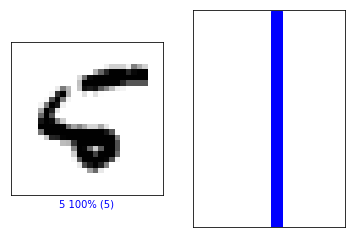

In [0]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 8 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

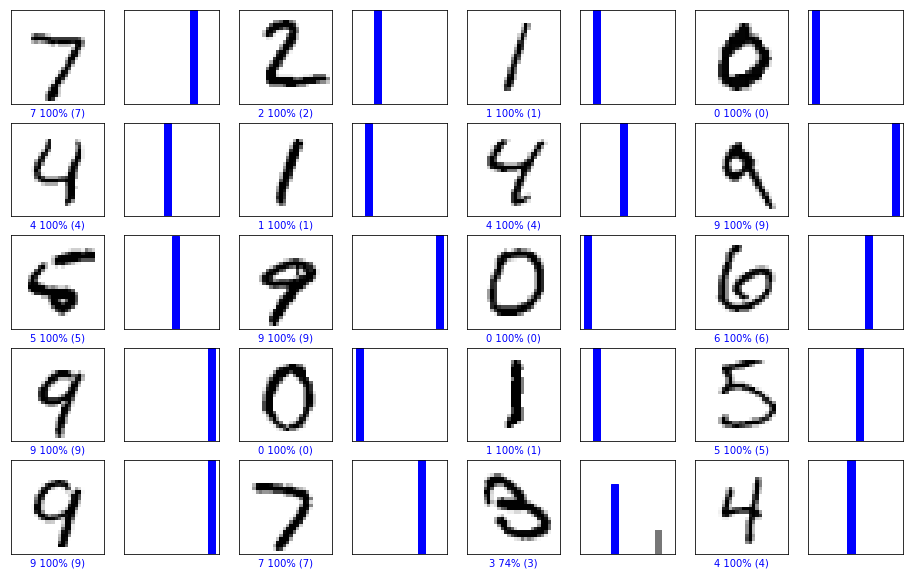

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

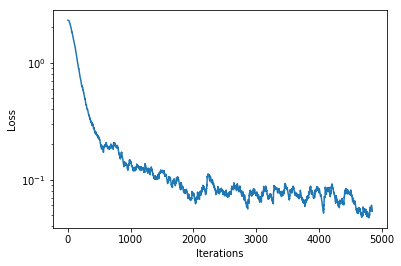

100%|#########################################################|Time:  0:01:08  


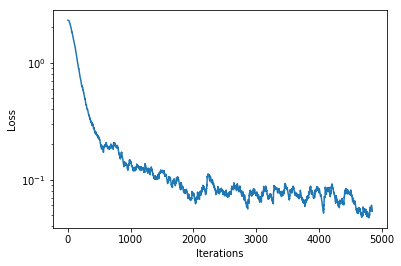

In [0]:
# Rebuild the CNN model
cnn_model = build_fc_model()

batch_size = 12
loss_history = util.LossHistory(smoothing_factor=0.99) # to record the evolution of the loss
plotter = util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2) # define our optimizer

bar = util.create_progress_bar()
for idx in bar(range(0, train_images.shape[0],batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images) # feed the images into the model
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) # value of the loss

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())
  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.variables)
  optimizer.apply_gradients(zip(grads, cnn_model.variables),
                            global_step=tf.train.get_or_create_global_step())